<a href="https://colab.research.google.com/github/leannmlindsey/ai-science-training-series/blob/main/Homework5_LLM_part02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Large language models (LLMs): Part II

Author: Archit Vasan , including materials on LLMs by Varuni Sastri, and discussion/editorial work by Taylor Childers, Carlo Graziani, Bethany Lusch, and Venkat Vishwanath (Argonne)

Inspiration from the blog posts "The Illustrated Transformer" and "The Illustrated GPT2" by Jay Alammar, highly recommended reading.

Before you begin, make sure that you have your environment set up and your repo refreshed, as described in previous lessons, and reviewed in the accompanying 'Readme.md' file. Make sure that you select the kernel 'datascience/conda-2023-01-10' at the top-left of the Jupyter notebook.

## Overview
1. Training and inference using Hugging Face
2. Elements of an LLM
3. Attention mechanisms
4. Positional encoding
5. Output layers
6. Training loops

## LLM training and inference using HuggingFace

<img src="images/hf-logo-with-title.png" alt="Drawing" style="width: 300px;"/>
HuggingFace is a platform and community that provides open-source library tools and resources like pre-trained models and datasets.
Refer to the following links for more information :

https://huggingface.co/docs/hub/index

https://huggingface.co/docs/transformers/en/index

Warning: _Large Language Models are only as good as their training data. They have no ethics, no judgement, or editing ability. We will be using some pretrained models from Hugging Face which used wide samples of internet hosted text. The datasets have not been strictly filtered to restrict all malign content so the generated text may be surprisingly dark or questionable. They do not reflect our core values and are only used for demonstration purposes._

### Inference

We can use the Huggingface pipeline with a pretrained GPT2 model to generate text given a prompt.

In [1]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 5.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
!nvidia-smi

Wed Apr 10 11:02:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install accelerate -U

In [4]:
from transformers import AutoTokenizer,AutoModelForCausalLM, AutoConfig
input_text = "My dog really wanted to"
from transformers import pipeline
generator = pipeline("text-generation", model="openai-community/gpt2")
generator(input_text, max_length=20, num_return_sequences=5)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'My dog really wanted to come and hug me, so I decided to hug her as well."\n'},
 {'generated_text': "My dog really wanted to share it with us. I didn't think it was that big of a"},
 {'generated_text': 'My dog really wanted to put her back into the house but the owner said "just keep him with'},
 {'generated_text': 'My dog really wanted to sleep with the little woman and I was just doing the night shift and her'},
 {'generated_text': 'My dog really wanted to show her a real love," she says. "Every time she has told'}]

We will cover  evaluation metrics,as well as safe and responsibilities practices when using LLMs in **Session 8**.

### Training

We can also load in our own dataset and train a model with this data as follows:

In [5]:
from transformers import TextDataset,DataCollatorForLanguageModeling

def load_dataset(train_path,test_path,tokenizer):
    train_dataset = TextDataset(
          tokenizer=tokenizer,
          file_path=train_path,
          block_size=128)
    test_dataset = TextDataset(
          tokenizer=tokenizer,
          file_path=test_path,
          block_size=128)
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=False,
    )
    return train_dataset,test_dataset,data_collator

In [6]:
from transformers import AutoTokenizer,AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")

train_dataset,test_dataset,data_collator = load_dataset('train_input.txt','test_input.txt', tokenizer)

from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./gpt2", #The output directory
    overwrite_output_dir=True, #overwrite the content of the output directory
    num_train_epochs=3, # number of training epochs
    per_device_train_batch_size=32, # batch size for training
    per_device_eval_batch_size=64,  # batch size for evaluation
    eval_steps = 40, # Number of update steps between two evaluations.
    save_steps=80, # after # steps model is saved
    warmup_steps=50,# number of warmup steps for learning rate scheduler
    prediction_loss_only=True,
    )

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (272065 > 1024). Running this sequence through the model will result in indexing errors
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, sp

## What is going on below the hood?

There are two components that are "black-boxes" here:
1. The method for tokenization
2. The model that generates novel text.

Carlo Graziani already gave a great explanation of tokenization last week and how this affects embeddings (https://github.com/argonne-lcf/ai-science-training-series/blob/main/04_intro_to_llms/Sequential_Data_Models.ipynb)

Today we will take a closer look at how the model is designed to deal with language.

Let's look inside GPT2! GPT2 incorporates the `GPT2LMHeadModel` architecture so let's inspect this more closely.

In [7]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
model = GPT2LMHeadModel.from_pretrained('openai-community/gpt2')
print(model)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)


## General elements of an LLM

GPT-2 is an example of the popular Transformer architecture.


<img src="images/decoder_only_block.png" alt="Drawing" style="width: 200px;"/>
Image credit: https://arxiv.org/pdf/1706.03762.pdf

The gray section in this figure is the Transfomer Decoder and it is the main mechanism GPT2 uses to encode context of language into its predictions.

<img src="images/transformer-decoder-intro.png" alt="Drawing" style="width: 600px;"/>
Image credit: https://jalammar.github.io/illustrated-gpt2/

The Transformer-Decoder is composed of Decoder blocks stacked ontop of each other where each contains two types of layers:
1. Masked Self-Attention and
2. Feed Forward Neural Networks.

You have already discussed Feed Forward Neural Networks in detail in the other lectures in this series. To review this, please look at https://github.com/argonne-lcf/ai-science-training-series/blob/main/02_intro_neural_networks/01_introduction_mnist.ipynb

In this lecture, we will
* First, discuss attention mechanisms at length as this is arguably the greatest contribution by Transformers.
* Second, extend the discussion from last week (https://github.com/argonne-lcf/ai-science-training-series/blob/main/04_intro_to_llms/Sequential_Data_Models.ipynb) on embedding input data while taking into account position.
* Third, discuss outputting real text/sequences from the models.
* Fourth, build a training loop for a mini-LLM.

**Let's set up all the imports we will need**

In [8]:
## IMPORTS

import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)
# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4 ## so head_size = 16
n_layer = 4
dropout = 0.0
# ------------

torch.manual_seed(1337)

## Attention mechanisms

Suppose the following sentence is an input sentence we want to translate using an LLM:

`”The animal didn't cross the street because it was too tired”`

Last week, Carlo mentioned that the Transformer learns an embedding of all words allowing interpretation of meanings of words.

<img src="images/viz-bert-voc-verbs.png" alt="Drawing" style="width: 400px;"/>

So, if the model did a good job in token embedding, it will "know" what all the words in this sentence mean.

But to understand a full sentence, the model also need to understand what each word means in relation to other words.

For example, when we read the sentence:
`”The animal didn't cross the street because it was too tired”`
we know intuitively that the word `"it"` refers to `"animal"`, the state for `"it"` is `"tired"`, and the associated action is `"didn't cross"`.

However, the model needs a way to learn all of this information in a simple yet generalizable way.
What makes Transformers particularly powerful compared to earlier sequential architectures is how it encodes context with the **self-attention mechanism**.

As the model processes each word in the input sequence, attention looks at other positions in the input sequence for clues to a better understanding for this word.

<img src="images/transformer_self-attention_visualization.png" alt="Drawing" style="width: 300px;"/>

Image credit: https://jalammar.github.io/illustrated-transformer/

Self-attention mechanisms use 3 vectors to encode the context of a word in a sequence with another word:
1. Query: the word representation we score other words against using the other word's keys
2. Key: labels for the words in a sequence that we match against the query
3. Value: actual word representation. We will use the queries and keys to score the word's relevance to the query, and multiply this by the value.

An analogy provided by Jay Alammar is thinking about attention as choosing a file from a file cabinet according to information on a post-it note. You can use the post-it note (query) to identify the folder (key) that most matches the topic you are looking up. Then you access the contents of the file (value) according to its relevance to your query.

<img src="images/self-attention-example-folders-3.png" alt="Drawing" style="width: 500px;"/>
Image credit: https://jalammar.github.io/illustrated-gpt2/

In our models, we can encode queries, keys, and values using simple linear layers with the same size (`sequence length, head_size`). During the training process, these layers will be updated to best encode context.

In [9]:
C = 32 # channels
head_size = 16

key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)

The algorithm for self-attention is as follows:

1. Generate query, key and value vectors for each word
2. Calculate a score for each word in the input sentence against each other.
3. Divide the scores by the square root of the dimension of the key vectors to stabilize the gradients. This is then passed through a softmax operation.
4. Multiply each value vector by the softmax score.
5. Sum up the weighted value vectors to produce the output.


<img src="images/self-attention-output.png" alt="Drawing" style="width: 450px;"/>

Image credit: https://jalammar.github.io/illustrated-transformer/

Let's see how attention is performed in the code.

In [10]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)
B,T,C = 4,8,32 # batch, time, channels
x = torch.randn(B,T,C)

# Here we want the wei to be data dependent - ie gather info from the past but in a data dependant way

head_size = 16
key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)
k = key(x)   # (B, T, 16) # each token here (totally B*T) produce a key and query in parallel and independently
q = query(x) # (B, T, 16)
v = value(x)

wei =  q @ k.transpose(-2, -1) * head_size**-0.5 # (B, T, 16) @ (B, 16, T) ---> (B, T, T). #
wei = F.softmax(wei, dim=-1) # exponentiate and normalize giving a nice distibution that sums to 1 and
                             # now it tells us that in a data dependent manner how much of info to aggregate from

out = wei @ v # aggregate the attention scores and value vector.


In [11]:
print(out[0])

tensor([[ 0.0618, -0.0091, -0.3488,  0.3208,  0.2971, -0.1573, -0.0561,  0.1068,
          0.0368,  0.0139, -0.0017,  0.3110,  0.1404, -0.0158,  0.1853,  0.4290],
        [ 0.1578, -0.0971, -0.4256,  0.3538,  0.3621, -0.2392, -0.0536,  0.1759,
          0.1115,  0.0282, -0.0649,  0.3641,  0.1928,  0.0261,  0.2162,  0.3758],
        [ 0.1293,  0.0759, -0.2946,  0.2292,  0.2215, -0.0710, -0.0107,  0.1616,
         -0.0930, -0.0877,  0.0567,  0.1899,  0.0311, -0.0894,  0.0309,  0.5471],
        [ 0.1247,  0.1400, -0.2436,  0.1819,  0.1976,  0.0338, -0.0028,  0.1124,
         -0.1477, -0.0748,  0.0650,  0.1392, -0.0314, -0.0989,  0.0613,  0.5433],
        [ 0.0667,  0.1845, -0.2135,  0.2813,  0.2064,  0.0873,  0.0084,  0.2055,
         -0.1130, -0.1466,  0.0459,  0.1923, -0.0275, -0.1107,  0.0065,  0.4674],
        [ 0.1924,  0.1693, -0.1568,  0.2284,  0.1620,  0.0737,  0.0443,  0.2519,
         -0.1912, -0.1979,  0.0832,  0.0713, -0.0826, -0.0848, -0.1047,  0.6089],
        [ 0.1184,  0.0

### Multi-head attention

In practice, multiple attention heads are used which
1. Expands the model’s ability to focus on different positions and prevent the attention to be dominated by the word itself.
2. Have multiple “representation subspaces”. Have multiple sets of Query/Key/Value weight matrices

<img src="images/transformer_multi-headed_self-attention-recap.png" alt="Drawing" style="width: 700px;"/>

Image credit: https://jalammar.github.io/illustrated-transformer/

### Let's see attention mechanisms in action!

We are going to use the powerful visualization tool bertviz, which allows an interactive experience of the attention mechanisms. Normally these mechanisms are abstracted away but this will allow us to inspect our model in more detail.

In [12]:
!pip install bertviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 46.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 11.3 MB/s eta 0:00:00


Let's load in the model, GPT2 and look at the attention mechanisms.

**Hint... click on the different blocks in the visualization to see the attention**

In [13]:
from transformers import AutoTokenizer, AutoModel, utils, AutoModelForCausalLM

from bertviz import model_view
utils.logging.set_verbosity_error()  # Suppress standard warnings

model_name = 'openai-community/gpt2'
input_text = "No, I am your father"
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
inputs = tokenizer.encode(input_text, return_tensors='pt')  # Tokenize input text
outputs = model(inputs)  # Run model
attention = outputs[-1]  # Retrieve attention from model outputs
tokens = tokenizer.convert_ids_to_tokens(inputs[0])  # Convert input ids to token strings
model_view(attention, tokens)  # Display model view

<IPython.core.display.Javascript object>

## Positional encoding

Last week, Carlo discussed token embedding, which is when words are encoded into a vocabulary. Now, we just discussed attention mechanisms which account for context between words. Another question we should ask is how do we account for the order of words in an input sentence

Consider the following two sentences to see why this is important:

``The man ate the sandwich.``

``The sandwich ate the man.``

Clearly, these are two vastly different situations even though they have the same words. The Transformer can

Transformers differentiate between these situations by adding a **Positional encoding** vector to each input embedding. These vectors follow a specific pattern that the model learns, which helps it determine the position of each word.

<img src="images/positional_encoding.png" alt="Drawing" style="width: 500px;"/>
Image credit: https://medium.com/@xuer.chen.human/llm-study-notes-positional-encoding-0639a1002ec0

We set up positional encoding similarly as token embedding using the ``nn.Embedding`` tool. We use a simple embedding here but there are more complex positional encodings used such as sinusoidal.

For an explanation of different positional encodings, refer to this post: https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/

In [14]:
vocab_size = 65
n_embd = 64

token_embedding_table = nn.Embedding(vocab_size, n_embd)
block_size = 32 # what is the maximum context length for predictions?
position_embedding_table = nn.Embedding(block_size, n_embd)

You will notice the positional encoding size is `(block_size, n_embed)` because it encodes for the postion of a token within the sequence of size `block_size`

Then, the position embedding used is simply added to the token embedding to apply positional embedding.

Let's look at token embedding alone:

In [15]:
x = torch.tensor([1,3,15,4,7,1,4,9])
x = token_embedding_table(x)
print(x[0])

tensor([ 0.7221, -0.9629, -2.0578,  1.9740,  0.7434,  1.1139,  0.6926,  0.0296,
         0.6405, -1.6464,  0.4935,  0.7485,  0.9238, -0.4940,  0.4814, -0.3859,
        -0.3094,  1.1066, -0.2891,  0.1891,  2.0440, -0.7945, -0.4331,  0.3007,
         1.4317,  0.2881, -0.4343,  0.4280,  1.2469,  1.4047, -0.3404, -2.2190,
         0.4893,  0.0398, -0.2717, -2.2400, -0.0029, -1.4251,  0.7330,  0.3551,
         0.1472, -1.1895, -0.8407,  0.3134, -0.6709, -0.8176,  0.6929, -0.6374,
         0.3174,  0.4837, -0.0073, -1.5924,  1.8606, -1.2910, -0.1594,  0.3111,
        -0.1536, -0.3414, -0.0170, -0.1633,  0.2794,  0.6755,  0.7066, -1.6665],
       grad_fn=<SelectBackward0>)


And token + positional embeddings:

In [16]:
x = torch.tensor([1,3,15,4,7,1,4,9])
x= position_embedding_table(x) + token_embedding_table(x)
print(x[0])

tensor([ 0.4326, -1.6287, -0.8684,  3.0704,  0.3646,  1.9826,  0.7582, -0.1918,
         1.0491, -2.2562, -0.4931, -0.7808,  1.7206, -1.0297,  2.0798, -1.3427,
        -0.7896, -0.1746,  0.0926,  0.0543,  2.3831, -0.6208,  0.3902,  0.1097,
         1.0455, -1.4557,  0.3402,  2.6717,  1.8380,  1.2628, -0.4831, -4.6023,
         0.6959,  1.0347,  0.5903, -0.7541,  0.4682, -0.3895,  2.1526,  0.6272,
        -0.8558, -0.8434,  0.1311, -1.0272, -2.0580,  0.0584,  0.3442, -0.3464,
        -0.3444,  2.3134, -1.1142, -1.4629,  3.3503, -2.0594,  1.4105,  0.4558,
        -1.3366,  1.9283,  1.5187,  0.3906,  1.1448, -0.8422,  2.2692, -0.7949],
       grad_fn=<SelectBackward0>)


You can see a clear offset between these two embeddings.

During the training process, these embeddings will be learned to best encode the token and positional embeddings of the sequences.

## Output layers

At the end of our Transformer model, we are left with a vector, so how do we turn this into a word?

<img src="images/transformer-decoder-intro.png" alt="Drawing" style="width: 400px;"/>

Using a final Linear layer and a Softmax Layer.
The Linear layer projects the vector produced by the stack of decoders, into a larger vector called a logits vector.

If our model knows 10,000 unique English words learned from its training dataset the logits vector is 10,000 cells wide – each cell corresponds to the score of a unique word.

The softmax layer turns those scores into probabilities. The cell with the highest probability is chosen, and the word associated with it is produced as the output for this time step.

<img src="images/transformer_decoder_output_softmax.png" alt="Drawing" style="width: 450px;"/>

Image credit: https://jalammar.github.io/illustrated-transformer/

## Training

How does an LLM improve over time?
We want to compare the probabilitiy distribution for each token generated by our model to the ground truths.
Our model produces a probability distribution for each token. We want to compare these probability distributions to the ground truths.
For example, when translating the sentence: “je suis étudiant” into “i am a student” as can be seen in the example:

<img src="images/output_target_probability_distributions.png" alt="Drawing" style="width: 500px;"/>

Image credit: https://jalammar.github.io/illustrated-transformer/

The model can calculate the loss between the vector it generates and the ground truth vector seen in this example. A commonly used loss function is cross entropy loss:

$CE = -\sum_{x \in X} p(x) log q(x)$

where p(x) represents the true distribution and q(x) represents the predicted distribution.

In [17]:
from torch.nn import functional as F
logits = torch.tensor([0.5, 0.1, 0.3])
targets = torch.tensor([1.0, 0.0, 0.0])
loss = F.cross_entropy(logits, targets)
print(loss)

tensor(0.9119)


Another important metric commonly used in LLMs is **perplexity**.

Intuitively, perplexity means to be surprised. We measure how much the model is surprised by seeing new data. The lower the perplexity, the better the training is.

Mathematically, perplexity is just the exponent of the negative cross entropy loss:

$\text{perplexity} = exp(\text{CE})$

In [18]:
perplexity = torch.exp(loss)
print(perplexity)

tensor(2.4891)


In this example, we are using cross entropy loss.

## Let's train a mini-LLM from scratch

### Set up hyperparameters:

In [19]:
# hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 10
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 64
n_head = 4 ## so head_size = 16
n_layer = 4
dropout = 0.0
# ------------

### Load in data and create train and test datasets

We're going to be using the tiny Shakespeare dataset.
Data is tokenized according to a simple character based tokenizer.
Data is split into a train and test set so we have something to test after performing training (9:1 split).

In [20]:
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

### Set up the components of the Decoder block:
* MultiHeadAttention
* FeedForward Network

In [21]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C) 16,32,16
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd), # Projection layer going back into the residual pathway
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)


### Combine components into the Decoder block

In [22]:
class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))    # Communication
        x = x + self.ffwd(self.ln2(x))  # Computation
        return x

### Set up the full Transformer model
This is a combination of the Token embeddings, Positional embeddings, a stack of Transformer blocks and an output block.

In [23]:
# super simple language model
class LanguageModel(nn.Module):

    def __init__(self):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd) # final layer norm
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding_table(idx) # (B,T,C)
        pos_emb = self.position_embedding_table(torch.arange(T, device=device)) # (T,C)
        x = tok_emb + pos_emb # (B,T,C)
        x = self.blocks(x) # (B,T,C)
        x = self.ln_f(x) # (B,T,C)
        logits = self.lm_head(x) # (B,T,vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B*T, C)
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx



## Homework 5 - pt 1 - Write the trainer and test the plotting

In [33]:
# code modified from GreenCrimea/Learning_Transformers
# https://github.com/eskinmi/gpt_naive/blob/master/models/bigram_attention.py
# suggested by google colab

import numpy as np
import pandas as pd


# hyperparameters
n_embd = 64
n_head = 4 ## so head_size = 16
n_layer = 4
max_iters = 500

model = LanguageModel().to(device)

# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

def calculate_perplexity(loss):
    return np.exp(loss)

data_list = []

for step in range(max_iters):
    # Evaluate periodically to make sure that training is going well
    if step % eval_interval == 0:
        L = estimate_loss()
        train_loss = L['train']
        valid_loss = L['val']

        train_perplexity = calculate_perplexity(train_loss)
        valid_perplexity = calculate_perplexity(valid_loss)

        print(f"step {step}: train loss {train_loss:.4f}, train perplexity {train_perplexity:.4f}, valid loss {valid_loss:.4f}, valid perplexity {valid_perplexity:.4f}")

        data_list.append([step, train_loss, train_perplexity, valid_loss, valid_perplexity])




    # sample a batch of data
    xb, yb = get_batch('train')
    # evaluate loss
    gen_logits, gen_loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    gen_loss.backward()
    optimizer.step()




step 0: train loss 4.3425, train perplexity 76.8970, valid loss 4.3489, valid perplexity 77.3967
step 10: train loss 3.4493, train perplexity 31.4769, valid loss 3.4709, valid perplexity 32.1643
step 20: train loss 3.2604, train perplexity 26.0605, valid loss 3.3010, valid perplexity 27.1411
step 30: train loss 3.1356, train perplexity 23.0026, valid loss 3.1763, valid perplexity 23.9586
step 40: train loss 3.0353, train perplexity 20.8074, valid loss 3.0716, valid perplexity 21.5772
step 50: train loss 2.9317, train perplexity 18.7596, valid loss 2.9671, valid perplexity 19.4360
step 60: train loss 2.8401, train perplexity 17.1173, valid loss 2.8515, valid perplexity 17.3134
step 70: train loss 2.7845, train perplexity 16.1911, valid loss 2.8001, valid perplexity 16.4461
step 80: train loss 2.7181, train perplexity 15.1518, valid loss 2.7425, valid perplexity 15.5258
step 90: train loss 2.6840, train perplexity 14.6432, valid loss 2.6925, valid perplexity 14.7692
step 100: train loss 

In [34]:

df = pd.DataFrame(data_list, columns=['step', 'train_loss', 'train_perplexity', 'valid_loss', 'valid_perplexity'])
df


,step,train_loss,train_perplexity,valid_loss,valid_perplexity
0,0,tensor(4.3425),tensor(76.8970),tensor(4.3489),tensor(77.3967)
1,10,tensor(3.4493),tensor(31.4769),tensor(3.4709),tensor(32.1643)
2,20,tensor(3.2604),tensor(26.0605),tensor(3.3010),tensor(27.1411)
3,30,tensor(3.1356),tensor(23.0026),tensor(3.1763),tensor(23.9586)
4,40,tensor(3.0353),tensor(20.8074),tensor(3.0716),tensor(21.5772)
5,50,tensor(2.9317),tensor(18.7596),tensor(2.9671),tensor(19.4360)
6,60,tensor(2.8401),tensor(17.1173),tensor(2.8515),tensor(17.3134)
7,70,tensor(2.7845),tensor(16.1911),tensor(2.8001),tensor(16.4461)
8,80,tensor(2.7181),tensor(15.1518),tensor(2.7425),tensor(15.5258)
9,90,tensor(2.6840),tensor(14.6432),tensor(2.6925),tensor(14.7692)


In [35]:
import matplotlib.pyplot as plt
def plot_loss_perplexity(df):
  plt.figure(figsize=(14, 6))  # Adjust the figure size as needed

  plt.subplot(1, 2, 1)
  plt.plot(df['step'], df['train_loss'], label='Train Loss', color='blue')
  plt.plot(df['step'], df['valid_loss'], label='Valid Loss', color='red')
  plt.xlabel('Training Steps')
  plt.ylabel('Loss')
  plt.title('Loss Over Training Steps')
  plt.legend()

  # Plotting perplexity over training steps
  plt.subplot(1, 2, 2)
  plt.plot(df['step'], df['train_perplexity'], label='Train Perplexity', color='blue')
  plt.plot(df['step'], df['valid_perplexity'], label='Valid Perplexity', color='red')
  plt.xlabel('Training Steps')
  plt.ylabel('Perplexity')
  plt.title('Perplexity Over Training Steps')
  plt.legend()

  plt.tight_layout()  # Adjust subplot parameters to give specified padding.
  plt.show()

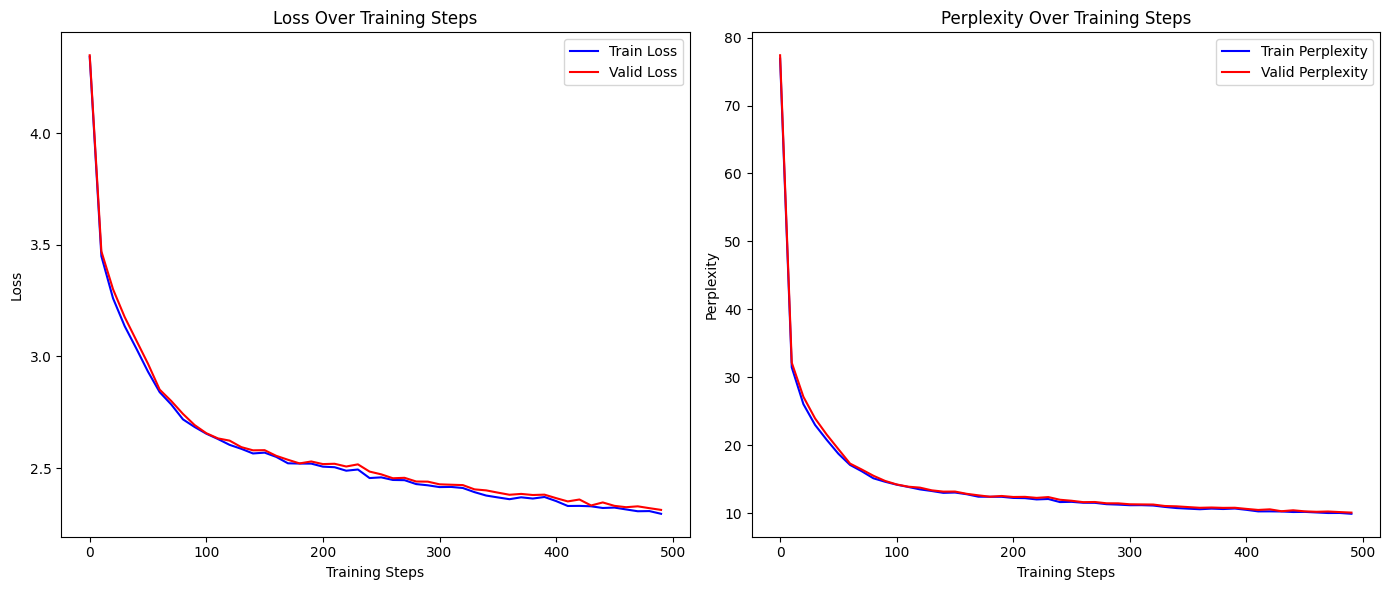

In [36]:
plot_loss_perplexity(df)

## Homework 5 - pt 2 - Wrap trainer and plotting in complete functions

In [37]:
def MyTrainer(n_embd,n_head,n_layer,max_iters):
  # hyperparameters
  #n_embd = 64
  #n_head = 4 ## so head_size = 16
  #n_layer = 4
  #max_iters = 500

  model = LanguageModel().to(device)

  # create a PyTorch optimizer
  optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

  @torch.no_grad()
  def estimate_loss():
      out = {}
      model.eval()
      for split in ['train', 'val']:
          losses = torch.zeros(eval_iters)
          for k in range(eval_iters):
              X, Y = get_batch(split)
              logits, loss = model(X, Y)
              losses[k] = loss.item()
          out[split] = losses.mean()
      model.train()
      return out

  def calculate_perplexity(loss):
      return np.exp(loss)

  data_list = []

  for step in range(max_iters):
      # Evaluate periodically to make sure that training is going well
      if step % eval_interval == 0:
          L = estimate_loss()
          train_loss = L['train']
          valid_loss = L['val']

          train_perplexity = calculate_perplexity(train_loss)
          valid_perplexity = calculate_perplexity(valid_loss)

          print(f"step {step}: train loss {train_loss:.4f}, train perplexity {train_perplexity:.4f}, valid loss {valid_loss:.4f}, valid perplexity {valid_perplexity:.4f}")

          data_list.append([step, train_loss, train_perplexity, valid_loss, valid_perplexity])




      # sample a batch of data
      xb, yb = get_batch('train')
      # evaluate loss
      gen_logits, gen_loss = model(xb, yb)
      optimizer.zero_grad(set_to_none=True)
      gen_loss.backward()
      optimizer.step()

  df = pd.DataFrame(data_list, columns=['step', 'train_loss', 'train_perplexity', 'valid_loss', 'valid_perplexity'])
  return df


## Homework 5 - pt 3 - Run 4 times with different parameters

### Run 1 - Baseline

In [39]:
n_embd = 64
n_head = 4 ## so head_size = 16
n_layer = 4
max_iters = 500
filename = 'baseline.csv'

step 0: train loss 4.3811, train perplexity 79.9285, valid loss 4.3716, valid perplexity 79.1681
step 10: train loss 3.4446, train perplexity 31.3297, valid loss 3.4749, valid perplexity 32.2941
step 20: train loss 3.2652, train perplexity 26.1844, valid loss 3.3085, valid perplexity 27.3433
step 30: train loss 3.1691, train perplexity 23.7862, valid loss 3.1964, valid perplexity 24.4452
step 40: train loss 3.0512, train perplexity 21.1415, valid loss 3.0822, valid perplexity 21.8053
step 50: train loss 2.9605, train perplexity 19.3079, valid loss 2.9849, valid perplexity 19.7852
step 60: train loss 2.8656, train perplexity 17.5600, valid loss 2.8968, valid perplexity 18.1162
step 70: train loss 2.8025, train perplexity 16.4856, valid loss 2.8229, valid perplexity 16.8257
step 80: train loss 2.7491, train perplexity 15.6286, valid loss 2.7646, valid perplexity 15.8734
step 90: train loss 2.7170, train perplexity 15.1352, valid loss 2.7307, valid perplexity 15.3437
step 100: train loss 

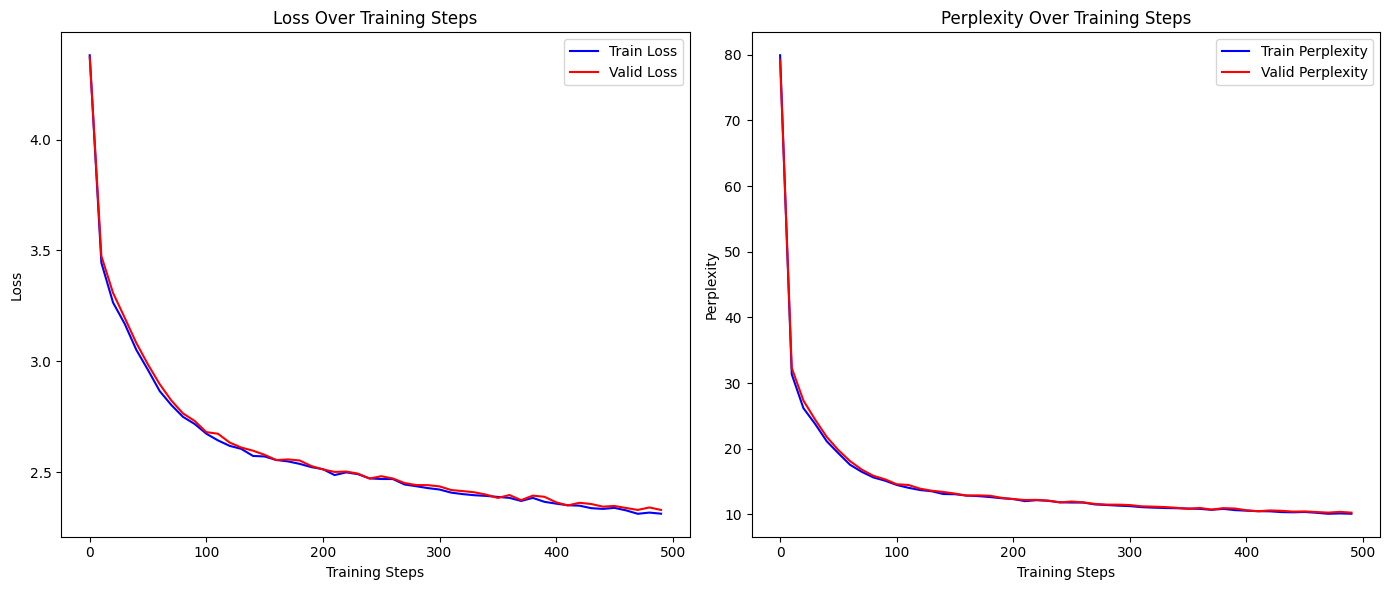

In [40]:
df = MyTrainer(n_embd,n_head,n_layer,max_iters)
plot_loss_perplexity(df)
df.to_csv(filename, index=False)

### Run 2 - Fewer Layers

In [41]:
n_embd = 64
n_head = 4 ## so head_size = 16
n_layer = 2
max_iters = 500
filename = 'fewer_layers.csv'

step 0: train loss 4.3276, train perplexity 75.7598, valid loss 4.3315, valid perplexity 76.0557
step 10: train loss 3.5262, train perplexity 33.9946, valid loss 3.5635, valid perplexity 35.2868
step 20: train loss 3.3088, train perplexity 27.3520, valid loss 3.3369, valid perplexity 28.1316
step 30: train loss 3.2304, train perplexity 25.2901, valid loss 3.2728, valid perplexity 26.3861
step 40: train loss 3.1455, train perplexity 23.2303, valid loss 3.1722, valid perplexity 23.8592
step 50: train loss 3.0471, train perplexity 21.0548, valid loss 3.0821, valid perplexity 21.8038
step 60: train loss 2.9539, train perplexity 19.1799, valid loss 2.9858, valid perplexity 19.8026
step 70: train loss 2.8649, train perplexity 17.5472, valid loss 2.9062, valid perplexity 18.2874
step 80: train loss 2.8132, train perplexity 16.6630, valid loss 2.8294, valid perplexity 16.9353
step 90: train loss 2.7571, train perplexity 15.7534, valid loss 2.7943, valid perplexity 16.3518
step 100: train loss 

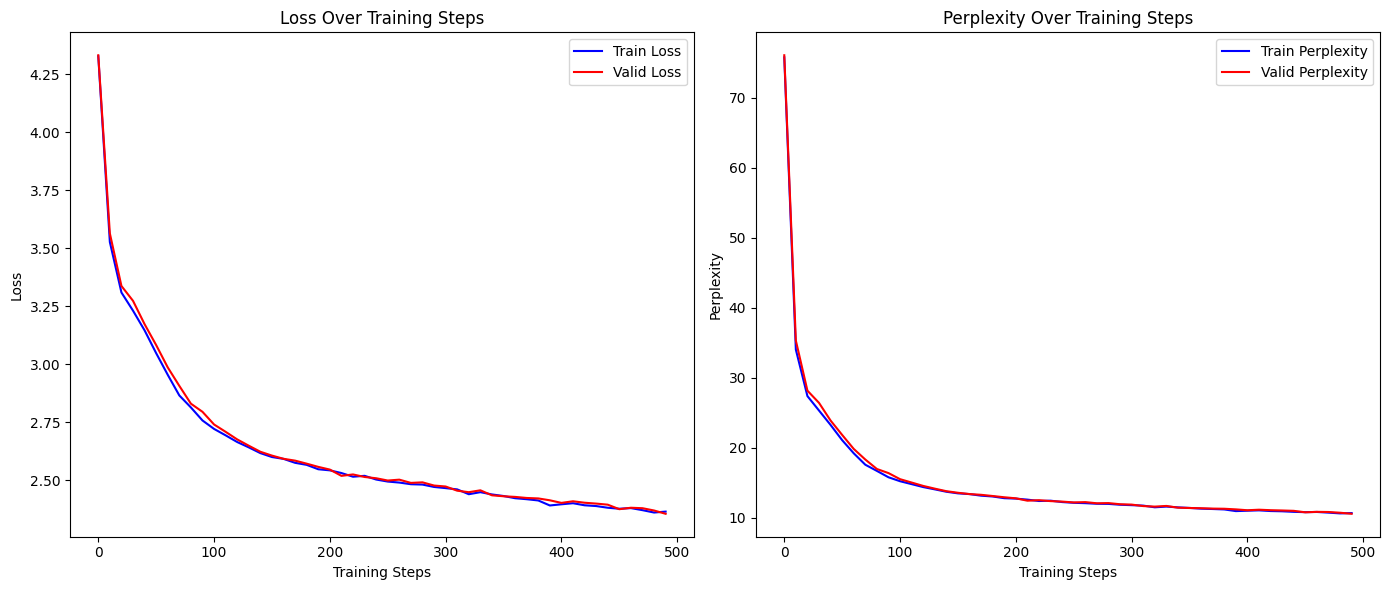

In [42]:
df = MyTrainer(n_embd,n_head,n_layer,max_iters)
plot_loss_perplexity(df)
df.to_csv(filename, index=False)

### Run 3 - More Heads

In [43]:
n_embd = 64
n_head = 16 ## so head_size = 16
n_layer = 4
max_iters = 500
filename = 'more_heads.csv'

step 0: train loss 4.3217, train perplexity 75.3171, valid loss 4.3243, valid perplexity 75.5109
step 10: train loss 3.4270, train perplexity 30.7854, valid loss 3.4575, valid perplexity 31.7385
step 20: train loss 3.2834, train perplexity 26.6660, valid loss 3.3143, valid perplexity 27.5044
step 30: train loss 3.1753, train perplexity 23.9329, valid loss 3.2172, valid perplexity 24.9583
step 40: train loss 3.0545, train perplexity 21.2099, valid loss 3.0922, valid perplexity 22.0254
step 50: train loss 2.9541, train perplexity 19.1843, valid loss 2.9848, valid perplexity 19.7820
step 60: train loss 2.8705, train perplexity 17.6465, valid loss 2.8870, valid perplexity 17.9386
step 70: train loss 2.7821, train perplexity 16.1528, valid loss 2.8034, valid perplexity 16.5012
step 80: train loss 2.7358, train perplexity 15.4218, valid loss 2.7434, valid perplexity 15.5395
step 90: train loss 2.7023, train perplexity 14.9138, valid loss 2.7101, valid perplexity 15.0302
step 100: train loss 

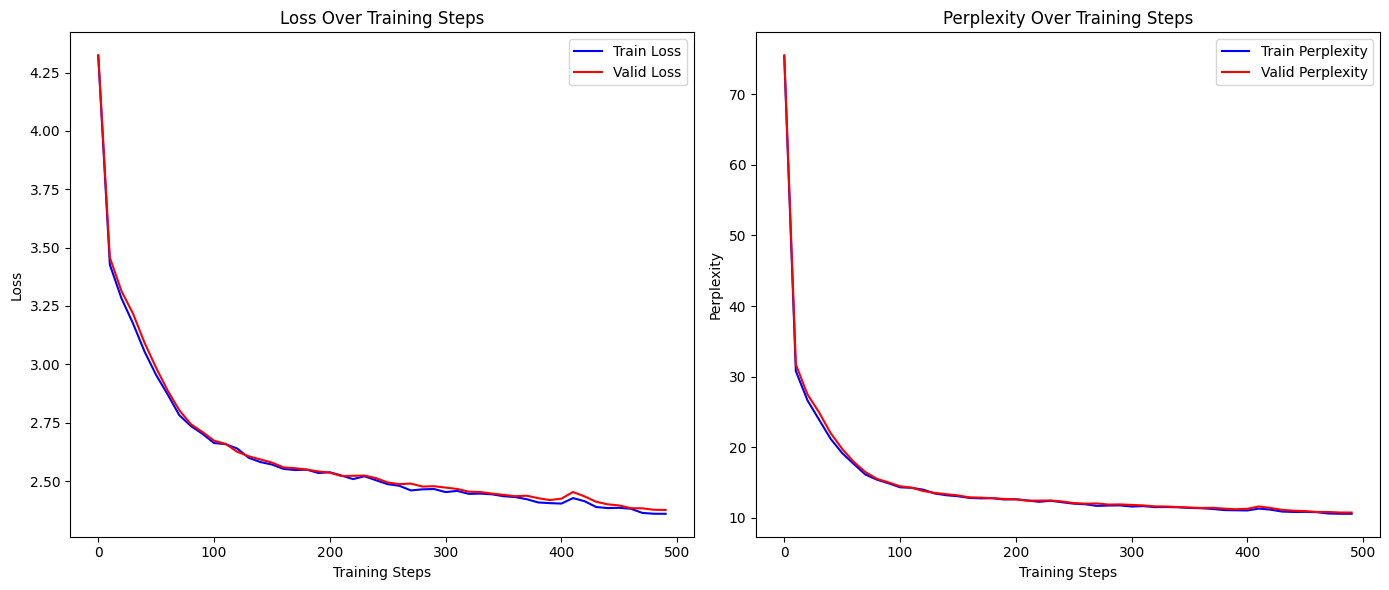

In [44]:
df = MyTrainer(n_embd,n_head,n_layer,max_iters)
plot_loss_perplexity(df)
df.to_csv(filename, index=False)

### Run 4 - More Layers

In [45]:
n_embd = 64
n_head = 4 ## so head_size = 16
n_layer = 8
max_iters = 500
filename = 'more_layers.csv'

step 0: train loss 4.2012, train perplexity 66.7667, valid loss 4.2095, valid perplexity 67.3245
step 10: train loss 3.3594, train perplexity 28.7710, valid loss 3.3935, valid perplexity 29.7713
step 20: train loss 3.1722, train perplexity 23.8602, valid loss 3.2106, valid perplexity 24.7931
step 30: train loss 3.0339, train perplexity 20.7779, valid loss 3.0777, valid perplexity 21.7078
step 40: train loss 2.9180, train perplexity 18.5048, valid loss 2.9358, valid perplexity 18.8357
step 50: train loss 2.8229, train perplexity 16.8252, valid loss 2.8500, valid perplexity 17.2871
step 60: train loss 2.7620, train perplexity 15.8313, valid loss 2.7893, valid perplexity 16.2691
step 70: train loss 2.7160, train perplexity 15.1198, valid loss 2.7414, valid perplexity 15.5087
step 80: train loss 2.6773, train perplexity 14.5457, valid loss 2.6868, valid perplexity 14.6841
step 90: train loss 2.6426, train perplexity 14.0491, valid loss 2.6644, valid perplexity 14.3596
step 100: train loss 

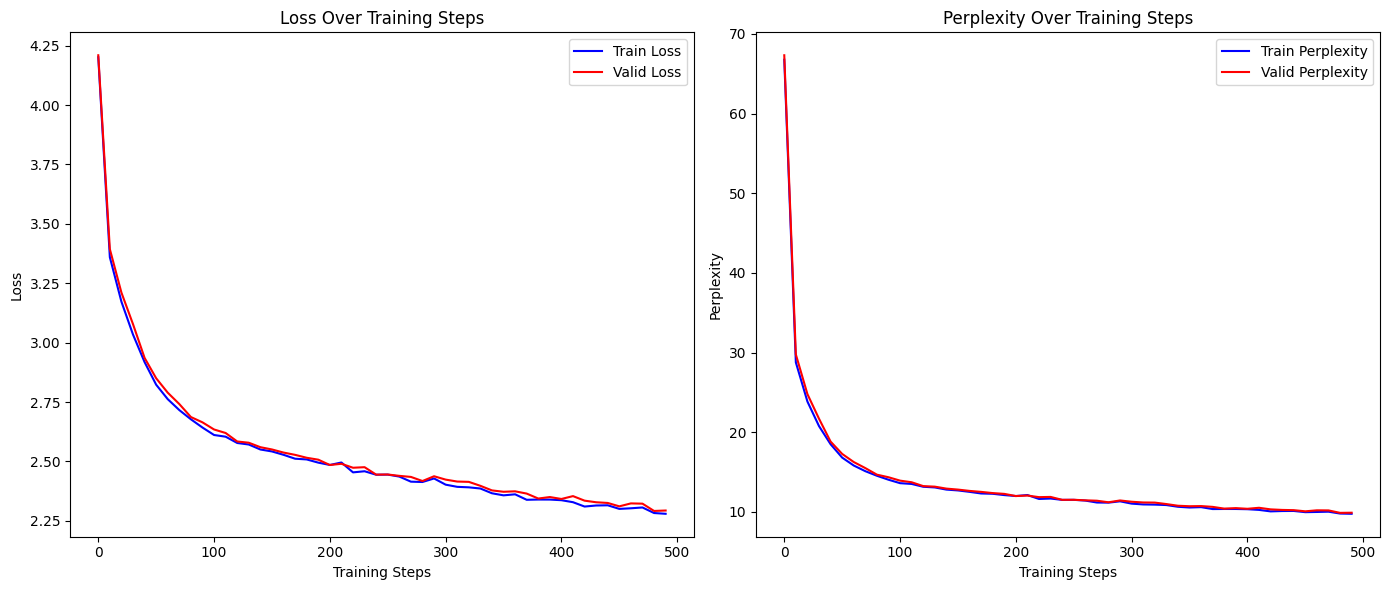

In [46]:
df = MyTrainer(n_embd,n_head,n_layer,max_iters)
plot_loss_perplexity(df)
df.to_csv(filename, index=False)

## Homework 5 - pt 4 - Observations (one sentence) for each run

Note: I was running out of time so I changed max_iters to 500 instead of 5000.  I'm sure the complexity would continue to go down if I had time to run 4 models out to 5000 iterations, but I am working on google colab, which keeps crashing and so there is not time to do that.  It is possible that with more iterations, more differences in the final perplexity would be observed.

### Run 1 - Baseline
The baseline perplexity goes from approx 79 to 10, which means that at the end of training, the model is confident that their word choice is about one in ten words. Final Perplexity: 10.26

### Run 2 - Fewer Layers
I would expect with fewer layers that the model perplexity would be higher, ie the model would learn more slowly.  The actual output was surprising because it was very close, though lower, than the baseline model. Final Perplexity: 10.53

### Run 3 - More Heads
I would have expected with more heads that the final perplexity would be lower than the baseline, but it was not.  Final Perplexity: 10.76

### Run 4 - More Layers
I would expect more layers to learn better and this was the case.  It was much more effective to add more layers than more heads.  You can see this from the initial perplexity which starts at approx 87 for all previous models but starts at 67 in this model. Final Perplexity: 9.90

## References

Here are some recommendations for further reading and additional code for review.

* "The Illustrated Transformer" by Jay Alammar
* "Visualizing A Neural Machine Translation Model (Mechanics of Seq2seq Models With Attention)"
* "The Illustrated GPT-2 (Visualizing Transformer Language Models)"
* "A gentle introduction to positional encoding"
* "LLM Tutorial Workshop (Argonne National Laboratory)"
* "LLM Tutorial Workshop Part 2 (Argonne National Laboratory)"